# Instruções de como realizar os testes
*Execute todas as células abaixo até a seção "Gerar datasets sintéticos"*
*Em seguida, escolha e execute uma das células da próxima seção para gerar o dataset correspondente*
*Por fim basta executar todas as células da "Seção de testes"*

**Imports**

In [24]:
import time
from sklearn.metrics import silhouette_score, adjusted_rand_score
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

**Distância**

In [25]:
def dist_minkowski(ponto1, ponto2, p):
    return np.sum(np.abs(ponto1 - ponto2) ** p) ** (1 / p)

**Cálculo da Matriz de Distâncias**

In [26]:
def matrizDistancias(pontos, tamanho, p):
    matriz = np.zeros((tamanho, tamanho))
    tam = len(pontos)
    for i in range(tam):
        for j in range(tam):
            distancia = dist_minkowski(pontos[i][1], pontos[j][1], p)
            matriz[i, j] = distancia
    return matriz

**Rotulamento**

In [7]:
def rotular_pontos(S, C, matriz):
    labels = []
    tamanho = len(S)
    for indiceLinha in range(tamanho):
        distancias = []
        for centro in C:
            indiceColuna = centro[0]
            distancias.append(matriz[indiceLinha][indiceColuna])
        labels.append(np.argmin(distancias))
    return np.array(labels)

**K-Centros, Primeira Abordagem**

In [8]:
def removerPtos2r(S2, s, r, matriz):
    dist2r = 2 * r
    Slista = S2.tolist()
    Snumpy = S2
    for i in range(len(Slista)):
        Slista[i] = list(Slista[i])
    indiceLinha = s[0]
    for outro in Snumpy:
        indiceColuna = outro[0]
        distaux = matriz[indiceLinha][indiceColuna]
        if distaux <= dist2r:
            outroLista = list(outro)
            Slista.remove(outroLista)
    S4 = np.array(Slista, dtype=object)
    return S4

In [9]:
def kCentrosComplicado(S, k, matriz, r):
    S2 = S
    C = []
    tamanhoS2 = len(S2)
    while tamanhoS2 != 0:
        s = S2[0]
        C.append(s)
        S2 = removerPtos2r(S2, s, r, matriz)
        tamanhoS2 = len(S2)
        tamanhoC = len(C)
    if tamanhoC <= k:
        return (C, True)
    else:
        return (False, False)

In [10]:
def descobrirraiomax(matriz):
    maxDist = np.max(matriz)
    return maxDist

In [11]:
def descobrirRaio(S, k, matriz, porcentagem):
    rmax = descobrirraiomax(matriz)
    low, high = 0, rmax
    convergencia = high - low
    while convergencia > (rmax * porcentagem / 100):
        meio = (low + high) / 2
        resultado = kCentrosComplicado(S, k, matriz, meio)
        if resultado[1] is True:
            high = meio
        else:
            low = meio
        convergencia = high - low
    resultado2 = resultado[0]
    if resultado2 is False:
        return 'Sem solução'
    else:
        resultado3 = [item[1] for item in resultado2]
        return (resultado2, high, resultado3)

**K-Centros, Segunda abordagem**

In [12]:
def maxDist(S, C, matriz):
    sMax = []
    distMax = 0
    menores = []
    tamanho = len(S)
    for s in range(tamanho):
        distancias = [matriz[s][c[0]] for c in C]
        indice = np.argmin(distancias)
        elemento = distancias[indice]
        menores.append(elemento) #pra cada ponto, vejo a menor distância entre s e qualquer ponto de C
    indiceMax = np.argmax(menores)
    distMax = menores[indiceMax]
    sMax = S[indiceMax]
    return sMax, distMax

In [13]:
def kCentrosSimples(S, k, matriz):
    tamanhoS = len(S)
    C = []
    if k >= tamanhoS:
        return S
    sArbitrario = S[0]
    C.append(sArbitrario)
    tamanhoC = len(C)
    raio = 0
    while tamanhoC < k:
        s, raioaux = maxDist(S, C, matriz)
        C.append(s)
        tamanhoC = len(C)
        if raioaux > raio:
            raio = raioaux
    centros = [item[1] for item in C]
    return (C, raio, centros)

**K-Means**

In [28]:
def myKMeans(df, k, rotulos_reais):
    # Normalizar os dados
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df_scaled)
    # Prever os clusters
    labels = kmeans.predict(df_scaled)
    # Centroides dos clusters
    centros = kmeans.cluster_centers_
    silhueta = silhouette_score(pontos1, labels)
    true_labels = rotulos_reais
    rand_ajustado = adjusted_rand_score(true_labels, labels)
    return (labels, centros, silhueta, rand_ajustado)

**Função que gera datasets utilizando a distribuição normal multivariada**

In [15]:
def gerar_datasets_dist_multiv(n_samples_per_cluster, cov, centers):
    points = []
    labels = []
    
    for i, center in enumerate(centers):
        cluster_points = np.random.multivariate_normal(center, cov, n_samples_per_cluster)
        points.append(cluster_points)
        cluster_labels = np.full(n_samples_per_cluster, i)
        labels.append(cluster_labels)
    
    points = np.vstack(points) 
    labels = np.hstack(labels)

    return points, labels

# Gera datasets sintéticos
*Escolha umas das células abaixo para gerar o dataset correspondente e execute-a; Em seguinta vá para a célula "Seção de testes"*

**Testes - Dataset 1**

In [16]:
centers = [0,0],[3,4],[6,6]
cov = [[1,0.5],[0.5,1]]
pontos1, rotulos_reais = gerar_datasets_dist_multiv(234,cov,centers)
aux = {x for x in rotulos_reais}
nclusters=len(aux)

**Testes - Dataset 2**

In [60]:
centers = [0,0],[3,4],[6,6]
cov = [[1,0.5],[0.5,1]]
pontos1, rotulos_reais = gerar_datasets_dist_multiv(234,cov,centers)
aux = {x for x in rotulos_reais}
nclusters=len(aux)

([0, 0], [3, 4], [6, 6])


**Testes - Dataset 3**

In [73]:
centers = [0,0],[5,5],[0,5],[5,0]
cov = [[1,0],[0,1]]
pontos1, rotulos_reais = gerar_datasets_dist_multiv(234,cov,centers)
aux = {x for x in rotulos_reais}
nclusters=len(aux)

([0, 0], [5, 5], [0, 5], [5, 0])


**Testes - Dataset 4**

In [83]:
centers = [0,0],[5,5],[0,5],[5,0]
cov = [[1,0.9],[0.9,1]]
pontos1, rotulos_reais = gerar_datasets_dist_multiv(234,cov,centers)
aux = {x for x in rotulos_reais}
nclusters=len(aux)

([0, 0], [5, 5], [0, 5], [5, 0])


**Testes - Dataset 5**

In [99]:
centers = [0,0],[4,4]
cov = [[1,0.5],[0.5,1]]
pontos1, rotulos_reais = gerar_datasets_dist_multiv(350,cov,centers)
aux = {x for x in rotulos_reais}
nclusters=len(aux)

([0, 0], [4, 4]) 2


**Testes - Dataset 6**

In [108]:
centers = [0,0],[2,2]
cov = [[1,0.5],[0.5,1]]
pontos1, rotulos_reais = gerar_datasets_dist_multiv(350,cov,centers)
aux = {x for x in rotulos_reais}
nclusters=len(aux)

([0, 0], [2, 2]) 2


**Testes - Dataset 7**

In [125]:
centers = [0,0],[4,0],[2,3]
cov = [[1,0.9],[0.9,1]]
pontos1, rotulos_reais = gerar_datasets_dist_multiv(234,cov,centers)
aux = {x for x in rotulos_reais}
nclusters=len(aux)

([0, 0], [4, 0], [2, 3]) 3


**Testes - Dataset 8**

In [135]:
centers = [0,0],[4,0],[2,3]
cov = [[1,0.1],[0.1,1]]
pontos1, rotulos_reais = gerar_datasets_dist_multiv(234,cov,centers)
aux = {x for x in rotulos_reais}
nclusters=len(aux)

([0, 0], [4, 0], [2, 3]) 3


**Testes - Dataset 9**

In [145]:
centers = [0,0],[10,0]
cov = [[1,0.2],[0.2,1]]
pontos1, rotulos_reais = gerar_datasets_dist_multiv(350,cov,centers)
aux = {x for x in rotulos_reais}
nclusters=len(aux)

([0, 0], [10, 0]) 2


**Testes - Dataset 10**

In [161]:
centers = [0,0],[4,0]
cov = [[1,0.2],[0.2,1]]
pontos1, rotulos_reais = gerar_datasets_dist_multiv(350,cov,centers)
aux = {x for x in rotulos_reais}
nclusters=len(aux)

([0, 0], [4, 0]) 2


# Seção de testes
*Para a realização de todos os testes, basta executar as células seguintes em sequência*

**Testes do algoritmo K-Centro (1ª abordagem)**

In [17]:
tuplas = [(i, ponto) for i, ponto in enumerate(pontos1)]
k = nclusters
pontos = np.array(tuplas, dtype=object)
tamanho = pontos1.shape[0]

In [18]:
resultados = pd.DataFrame(columns=['Raio da solução','Média de Tempos','Desvio padrão de Tempos','Silhueta','Índice de Rand ajustado'])
tempos = np.zeros(30)
porcentagens = [1,7,13,19,25]
for p in range(1,3):
    matriz = matrizDistancias(pontos, tamanho, p)
    for s in range(5):
        porcentagem = porcentagens[s]
        for i in range(30):
            start = time.time()
            resposta = descobrirRaio(pontos, k, matriz, porcentagem)
            processing_time = time.time() - start
            tempos[i] = round(processing_time, 3)
        if resposta == 'Sem solução':
            nova_linha = pd.DataFrame([{'Raio da solução':'Sem solução','Média de Tempos':round(np.mean(tempos),3),
                            'Desvio padrão de Tempos':round(np.std(tempos),3),'Silhueta':'Sem solução','Índice de Rand ajustado':'Sem solução'}])
        else:
            centros = resposta[0]
            labels_pred = rotular_pontos(pontos, centros, matriz)
            silhueta = silhouette_score(pontos1, labels_pred)
            true_labels = rotulos_reais
            rand_ajustado = adjusted_rand_score(true_labels, labels_pred)
            nova_linha = pd.DataFrame([{'Raio da solução':round(resposta[1],3),'Média de Tempos':round(np.mean(tempos),3),
                            'Desvio padrão de Tempos':round(np.std(tempos),3),'Silhueta':round(silhueta,3),'Índice de Rand ajustado':round(rand_ajustado,3)}])
        resultados = pd.concat([resultados,nova_linha],ignore_index=True)

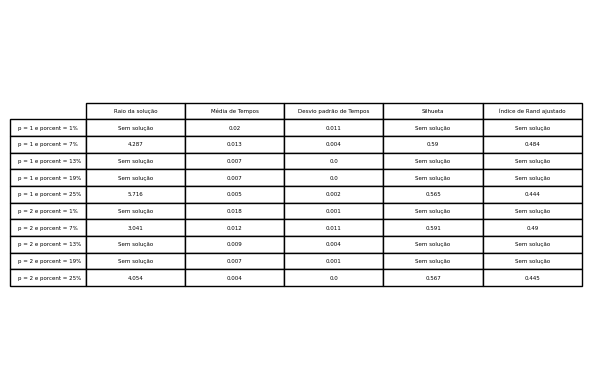

In [19]:
fig, ax = plt.subplots(1,1)
ax.axis('tight')
ax.axis('off')
rotulos_iteracoes = ['p = 1 e porcent = 1%', 'p = 1 e porcent = 7%', 'p = 1 e porcent = 13%', 'p = 1 e porcent = 19%','p = 1 e porcent = 25%',
                    'p = 2 e porcent = 1%','p = 2 e porcent = 7%','p = 2 e porcent = 13%','p = 2 e porcent = 19%','p = 2 e porcent = 25%']
table = ax.table(cellText=resultados.values,
                 colLabels=resultados.columns,
                 rowLabels=rotulos_iteracoes,
                 loc='center', cellLoc='center', edges='closed')
table.scale(1, 1)
plt.savefig('Tabela_1.png',bbox_inches='tight',dpi=300)

**Testes do algoritmo K-Centros (2ª abordagem)**

In [20]:
resultados = pd.DataFrame(columns=['Raio da solução','Média de Tempos','Desvio padrão de Tempos','Silhueta','Índice de Rand ajustado'])
tempos = np.zeros(30)
for p in range(1,3):
    matriz = matrizDistancias(pontos, tamanho, p)
        
    for i in range(30):
        start = time.time()
        resultado = kCentrosSimples(pontos, k, matriz)
        processing_time = time.time() - start
        tempos[i] = round(processing_time,3)
        
    centros = resultado[0]
    labels_pred = rotular_pontos(pontos, centros, matriz)
    silhueta = silhouette_score(pontos1, labels_pred)
    true_labels = rotulos_reais
    rand_ajustado = adjusted_rand_score(true_labels, labels_pred)
    nova_linha = pd.DataFrame([{'Raio da solução':round(resultado[1],3),'Média de Tempos':round(np.mean(tempos),3),
                            'Desvio padrão de Tempos':round(np.std(tempos),3),'Silhueta':round(silhueta,3),'Índice de Rand ajustado':round(rand_ajustado,3)}])
    resultados = pd.concat([resultados,nova_linha],ignore_index=True)

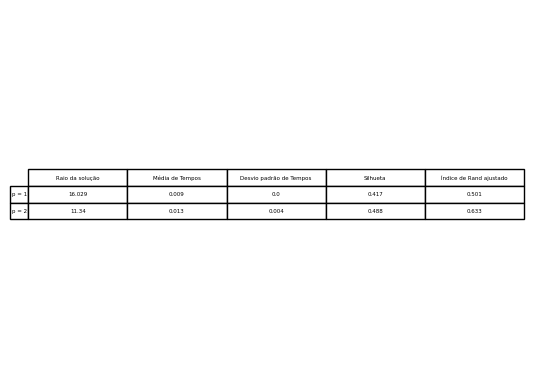

In [21]:
fig, ax = plt.subplots(1,1)
ax.axis('tight')
ax.axis('off')
rotulos_iteracoes = ['p = 1', 'p = 2']
table = ax.table(cellText=resultados.values,
                 colLabels=resultados.columns,
                 rowLabels=rotulos_iteracoes,
                 loc='center', cellLoc='center', edges='closed')
table.scale(1, 1)
plt.savefig('Tabela_2.png',bbox_inches='tight',dpi=300)

**Testes do algoritmo KMeans**

In [29]:
resultados = pd.DataFrame(columns=['Média de Tempos','Desvio padrão de Tempos','Silhueta','Índice de Rand ajustado'])
tempos = np.zeros(30)
for i in range(30):
    start = time.time()
    resultado = myKMeans(pontos1, k, rotulos_reais)
    processing_time = time.time() - start
    tempos[i] = round(processing_time,3)

nova_linha = pd.DataFrame([{'Média de Tempos':round(np.mean(tempos),3),
                            'Desvio padrão de Tempos':round(np.std(tempos),3),'Silhueta':round(resultado[2],3),'Índice de Rand ajustado':round(resultado[3],3)}])
resultados = pd.concat([resultados,nova_linha],ignore_index=True)

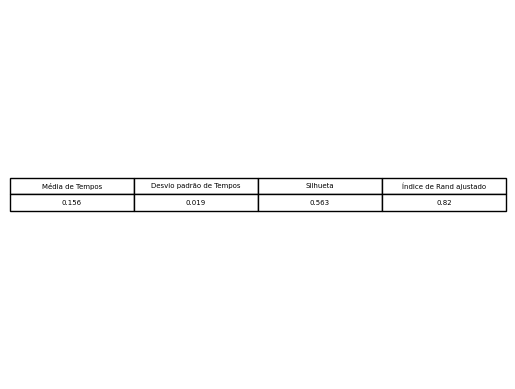

In [30]:
fig, ax = plt.subplots(1,1)
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=resultados.values,
                 colLabels=resultados.columns,
                 loc='center', cellLoc='center', edges='closed')
table.scale(1, 1)
plt.savefig('Tabela_3.png',bbox_inches='tight',dpi=300)